<a href="https://colab.research.google.com/github/GetKhanAdil/DataScience/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
fraud = pd.read_csv("D:/Phone data/Fraud.csv")
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## 1. Data cleaning including missing values, outliers and multi-collinearity.

In [ ]:
fraud.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

- As we can see there are no missing values in Dataset but that does not mean we have no null values becaue there can be 0 values in some variables.
- There is no point in checking outliers because it is finacial data where bank balance can be any real number value so there is really no parameter where we can scale it.

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# 

CHANGING THE TYPE SO THAT WE CAN REDUCE THE SIZE..

In [ ]:
fraud.isFlaggedFraud = fraud.isFlaggedFraud.astype("int8")

In [ ]:
fraud.isFraud = fraud.isFraud.astype("int8")

In [ ]:
fraud.step = fraud.step.astype("int16")

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int16  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int8   
 10  isFlaggedFraud  int8   
dtypes: float64(5), int16(1), int8(2), object(3)
memory usage: 412.6+ MB


In [ ]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
fraud.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
(8213/(6354407+8213)*100)

0.12908204481801522

Around .12% of transaction are marked as fraud

In [ ]:
fraud.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [ ]:
a = 16/(16+6362604)*100
print(a,"% transaction is flagged as fraud")

0.000251468734577894 % transaction is flagged as fraud


In [ ]:
fraud.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

### Multi-collinearity -

In [ ]:
df1 = fraud.copy(deep = 'true')
df1['type']=df1['type'].map({'PAYMENT':1 ,'TRANSFER':2, 'CASH_OUT':3, 'DEBIT':4, 'CASH_IN':5})
df1 = df1.drop(columns = ['nameOrig','nameDest','isFraud','isFlaggedFraud'])
df1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,1,9839.64,170136.0,160296.36,0.0,0.0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0
2,1,2,181.00,181.0,0.00,0.0,0.0
3,1,3,181.00,181.0,0.00,21182.0,0.0
4,1,1,11668.14,41554.0,29885.86,0.0,0.0


In [ ]:
#calculating VIf to check the MUlti-collinearity between variables -

vif_data = pd.DataFrame()                         
vif_data["feature"] = df1.columns
vif_data["VIF"] = [variance_inflation_factor(df1.values, i)
                          for i in range(len(df1.columns))]
print(vif_data)


          feature         VIF
0            step    2.466060
1            type    3.251976
2          amount    4.129854
3   oldbalanceOrg  501.282300
4  newbalanceOrig  508.906801
5  oldbalanceDest   73.377939
6  newbalanceDest   84.656570


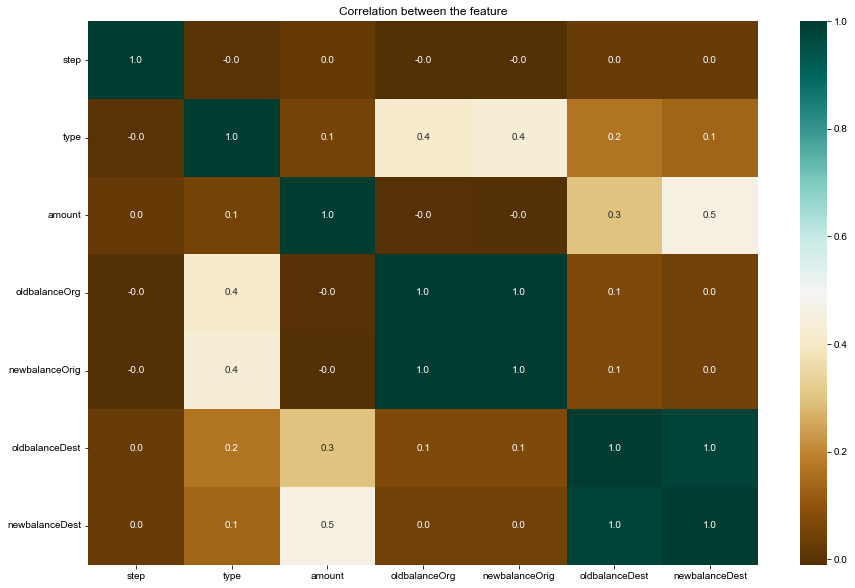

In [ ]:
##cmap stands for colormap and it's a colormap instance or registered colormap name
plt.figure(figsize=(15, 10))
plt.title("Correlation between the feature")
sns.heatmap(df1.corr(), annot=True, fmt= '.1f', cmap="BrBG")
sns.set(font_scale=2.25)
plt.show()

*  **As we can see, oldbalance and newbalance have very high values of VIF,It can be seen from heatmap indicating that these two variables are highly correlated. This is expected as the transaction happens does changes their values. Hence, considering these two features together leads to a model with high multicollinearity.**

# 

### 1. which type of transactions are fraud using isFraud -
There are 2 flags From those,isFraud is the indicator which indicates the actual fraud transactions whereas isFlaggedFraud is what the system prevents the transaction due to some thresholds being triggered.


In [ ]:
fraud.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0


In [ ]:
print("Type of transaction which are fraud:-->",fraud[fraud.isFraud==1].type.drop_duplicates().values)

print("Type of TRANSFER transaction which are fraud:-->",fraud[(fraud.isFraud==1) & (fraud.type =="TRANSFER" )].shape[0])

print("Type of CASH_OUT transaction which are fraud:-->",fraud[(fraud.isFraud==1) & (fraud.type =="CASH_OUT" )].shape[0])

Type of transaction which are fraud:--> ['TRANSFER' 'CASH_OUT']
Type of TRANSFER transaction which are fraud:--> 4097
Type of CASH_OUT transaction which are fraud:--> 4116


### 2. Analysis on isFlaggedFraud variable -

isFlaggedFraud = The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [ ]:
print("Total number of transaction which are flagged as Fraud :-->",fraud[(fraud.isFlaggedFraud == 1) ].shape[0])

print("Max amount of transaction which are not flagged as Fraud :-->",fraud[(fraud.isFlaggedFraud == 0) ].amount.max())

print("Min amount of transaction which are flagged as Fraud :-->",fraud[(fraud.isFlaggedFraud == 1) ].amount.min())


Total number of transaction which are flagged as Fraud :--> 16
Max amount of transaction which are not flagged as Fraud :--> 92445516.64
Min amount of transaction which are flagged as Fraud :--> 353874.22


**isFlaggedFraud variable is set to 1 when transfer is more than 200,000 in single transaction but we can see that from above analysis. This variable is useless because maximum amount transfer in single transcation is 92445516.64 , There are only 16 values where isFlaggedFraud is set so we will drop this feature**. 


### 3. oldbalanceDest and newbalanceDest variable -

* From below analysis we can see that as multiple newbalancedset and oldbalance dest have zero values because the transaction is put on hold & there are no information available for merchants. 


In [ ]:
print('number of recipant who have newbalancedest and oldbalancedest is zero:--->',fraud[(fraud.newbalanceDest == 0) & (fraud.oldbalanceDest == 0) ].shape[0])

number of recipant who have newbalancedest and oldbalancedest is zero:---> 2317282


#### Lets see how many merchants account in originator accounts and does merchants account have fraud transaction ?
oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

In [ ]:
print('Number of merchants in originator transaction:-->',fraud.nameOrig.str.contains("M").any())

print("Number of merchants in destination where type of transaction is TRANSFER:-->",fraud[(fraud.isFraud==1) & (fraud.type =="TRANSFER" )].nameDest.str.contains("M").any())

print("Number of merchants in destination where type of transaction is CASH_OUT:-->",fraud[(fraud.isFraud==1) & (fraud.type =="CASH_OUT" )].nameDest.str.contains("M").any())

Number of merchants in originator transaction:--> False
Number of merchants in destination where type of transaction is TRANSFER:--> False
Number of merchants in destination where type of transaction is CASH_OUT:--> False


##### There are no Merchant account through Fraud transaction is happen so missing information does not affect while building model

### Data cleaning -

### 3. How did you select variables to be included in the model?

From above analysis we know that fraud is only occured in 'TRANSFER' and 'CASH_OUT'. so we choose only those type of payment and we will remove Variables -[ nameorig , namedest , isFlaggedFraud ]

In [ ]:
fraud[(fraud.type == "TRANSFER") ]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0


In [ ]:
x = fraud.loc[(fraud.type == 'TRANSFER') | (fraud.type == 'CASH_OUT')]
y = x.isFraud
x = x.drop(['isFraud','isFlaggedFraud','nameOrig','nameDest'],axis = 1)
x['type']= x['type'].map({'TRANSFER':1,'CASH_OUT':2})

In [ ]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,1,1,181.00,181.00,0.0,0.00,0.00
3,1,2,181.00,181.00,0.0,21182.00,0.00
15,1,2,229133.94,15325.00,0.0,5083.00,51513.44
19,1,1,215310.30,705.00,0.0,22425.00,0.00
24,1,1,311685.89,10835.00,0.0,6267.00,2719172.89
...,...,...,...,...,...,...,...
6362615,743,2,339682.13,339682.13,0.0,0.00,339682.13
6362616,743,1,6311409.28,6311409.28,0.0,0.00,0.00
6362617,743,2,6311409.28,6311409.28,0.0,68488.84,6379898.11
6362618,743,1,850002.52,850002.52,0.0,0.00,0.00


#### Replacing missing values - 
* There are transactions where newbalanceorig and oldbalanceorig is zero while amount is non zero so we replace them with np.nan.
* There are newblancedest and oldbalancedest values are equal to zero but we can not inpute them because they shows the fraud transaction occured when amount is non zero instead of inputing them by 0 = -1

In [ ]:
x.loc[(x.newbalanceOrig == 0) & (x.oldbalanceOrg == 0) & (x.amount != 0),['newbalanceOrig','oldbalanceOrg'] ] = 0

In [ ]:
x.loc[(x.newbalanceDest == 0) & (x.oldbalanceDest == 0) & (x.amount != 0) ,['oldbalancedest','newbalancedest'] ] = -1

In [ ]:
x.loc[(x.newbalanceDest == 0) & (x.oldbalanceDest == 0) & (x.amount != 0)] 

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,oldbalancedest,newbalancedest
2,1,1,181.00,181.00,0.0,0.0,0.0,-1.0,-1.0
251,1,1,2806.00,2806.00,0.0,0.0,0.0,-1.0,-1.0
680,1,1,20128.00,20128.00,0.0,0.0,0.0,-1.0,-1.0
969,1,1,1277212.77,1277212.77,0.0,0.0,0.0,-1.0,-1.0
1115,1,1,35063.63,35063.63,0.0,0.0,0.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...
6362610,742,1,63416.99,63416.99,0.0,0.0,0.0,-1.0,-1.0
6362612,743,1,1258818.82,1258818.82,0.0,0.0,0.0,-1.0,-1.0
6362614,743,1,339682.13,339682.13,0.0,0.0,0.0,-1.0,-1.0
6362616,743,1,6311409.28,6311409.28,0.0,0.0,0.0,-1.0,-1.0


#### Feature engineering -
**From above analysis we can create two features of error at origin and destination account, where non zero amount is transfer but oldbalance and new balance have zero value**

In [ ]:
x['Error_Balance_Orig'] = x.newbalanceOrig + x.amount - x.newbalanceOrig   # eg origin- oldbal = 10 ,newbal = 8 ,amount = 2 so, error =  8+2-10 = 0 
x['Error_Balance_Dest'] = x.oldbalanceDest + x.amount - x.newbalanceDest   #eg - at dest its opposite , old bal = 8 ,new bal = 10 , amount = 2 :error = 8+2-10 = 0

In [ ]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,oldbalancedest,newbalancedest,Error_Balance_Orig,Error_Balance_Dest
2,1,1,181.00,181.00,0.0,0.00,0.00,-1.0,-1.0,181.00,1.810000e+02
3,1,2,181.00,181.00,0.0,21182.00,0.00,NaN,NaN,181.00,2.136300e+04
15,1,2,229133.94,15325.00,0.0,5083.00,51513.44,NaN,NaN,229133.94,1.827035e+05
19,1,1,215310.30,705.00,0.0,22425.00,0.00,NaN,NaN,215310.30,2.377353e+05
24,1,1,311685.89,10835.00,0.0,6267.00,2719172.89,NaN,NaN,311685.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,2,339682.13,339682.13,0.0,0.00,339682.13,NaN,NaN,339682.13,0.000000e+00
6362616,743,1,6311409.28,6311409.28,0.0,0.00,0.00,-1.0,-1.0,6311409.28,6.311409e+06
6362617,743,2,6311409.28,6311409.28,0.0,68488.84,6379898.11,NaN,NaN,6311409.28,1.000000e-02
6362618,743,1,850002.52,850002.52,0.0,0.00,0.00,-1.0,-1.0,850002.52,8.500025e+05


### Machine learning for  predicting fraudulent transactions - 


* checking if the data is imbalance or skew  -

In [ ]:
x_fraud = x.loc[y==1]

In [ ]:
x_not_fraud = x.loc[y==0]

In [ ]:
x_not_fraud.shape[0]

2762196

In [ ]:
x_fraud.shape[0]

8213

Data split in (80:20) ratio between train and tesy

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=27)

### 2. Describe your fraud detection model in elaboration.
* **Selection of ML algorithm**: A first approach to deal with imbalanced data is to balance it by discarding the majority class before applying an ML algorithm. The disadvantage of undersampling is that a model trained in this way will not perform well on real-world skewed test data since almost all the information was discarded. A better approach might be to oversample the minority class, say by the synthetic minority oversampling technique (SMOTE) contained in the 'imblearn' library. Motivated by this, I tried a variety of anomaly-detection and supervised learning approaches. I find, however, that the best result is obtained on the original dataset by using a ML algorithm based on ensembles of decision trees that intrinsically performs well on imbalanced data. Such algorithms not only allow for constructing a model that can cope with the missing values in our data, but they naturally allow for speedup via parallel-processing. Among these algorithms, the extreme gradient-boosted (XGBoost) algorithm used. Finally, XGBoost, like several other ML algorithms, allows for weighting the positive class more compared to the negative class --- a setting that also allows to account for the skew in the data

       

### 4. Demonstrate the performance of the model by using best set of tools.


* **Selection of metric**: Since the data is highly skewed, I use the area under the precision-recall curve (AUPRC) rather than the conventional area under the receiver operating characteristic (AUROC).AUPRC on a dataset with 99% negative 1% positive examples, and it will “focus” on how the model handles the 1% positive examples. If the model handles the positive examples well, AUPRC will be high. If the model does poorly on the positive examples, AUPRC will be low.

### 5. What are the key factors that predict fraudulent customer? 
key factors that predict fraudulent customer are isFraud and amount 

### 6. Do these factors make sense? If yes, How? If not, How not? 
yes,they make sense,if the amount is more we can assume it may be fraud and if isfraud is 1, the chances of its isFlaggedFraud is more.


In [ ]:
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier

In [ ]:
weights = (y == 0).sum() / (1.0 * (y == 1).sum())                  #xgb uses the scale_pos_weight to account for highly skewed datset
clf = XGBClassifier(max_depth = 3, scale_pos_weight = weights,
                n_jobs = 4)
probabilities = clf.fit(x_train,y_train).predict_proba(x_test)
print('AUPRC = {}'.format(average_precision_score(y_test, probabilities[:, 1])))

AUPRC = 0.9381922450243834


### SO AUPRC score is 0.93 means our model performing well on positive (fraudlant transaction) class.

In [ ]:
clf.score(x_test, y_test)

0.98942214329287

### Accuracy of Our model is 98%


**CONCLUSION** - 


### 7.What kind of prevention should be adopted while company update its infrastructure?
* Company can prevent fraudalnt transaction by focusing more on payment method type - 'Transfer' & 'Cash_out'
*  Look Out for Patterns in Fraud and Theft

### 8.Assuming these actions have been implemented, how would you determine if they work?
* we can retrain & maintain model after certain intervals so our model perform best under various fraudlant transaction. 
    